In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import Doc2Vec
from collections import namedtuple
import gensim.utils
from langdetect import detect
import re
import string

In [2]:
imdbdata=pd.read_csv('datos.csv')
data = np.array(imdbdata.titulo)
titles=np.array(imdbdata.descripcion)

imdbdata.head()

,titulo,descripcion
0,Novedades en cirugía de columna vertebral en 2015,"En este artículo de revisión, queremos destaca..."
1,Biomecánica del síndrome de latigazo cervical ...,El tratamiento mediante manipulaciones es una ...
2,Gestión integral del acceso vascular por los n...,El retraso en la creación de las Fístulas arte...
3,Expectativas y experiencias de uso de las muje...,Objetivo: Conocer las expectativas y las exper...
4,Percepción sobre las competencias específicas ...,Objetivo. La presente investigación se interes...


In [3]:

SentimentDocument = namedtuple('SentimentDocument', 'words tags title original_number')
n=0
alldocs = []  # Retendrá todos los documentos en el orden original

regex = re.compile('[%s]' % re.escape(string.punctuation)) #para eliminar la puntuación

for line_no, line in enumerate(data):
    if (type(line)==str):
        if (len(line)>150):
            if (detect(line) == 'es') :
                line = regex.sub('', line)
                tokens = gensim.utils.to_unicode(line).lower().split()
                words = tokens[0:]
                tags = [n]
                title = titles[line_no]
                alldocs.append(SentimentDocument(words, tags, title, line_no))
                n=n+1

Number of Documents :  461
Mean length of documents :  204.60737527114966


Text(0, 0.5, 'Length of the description')

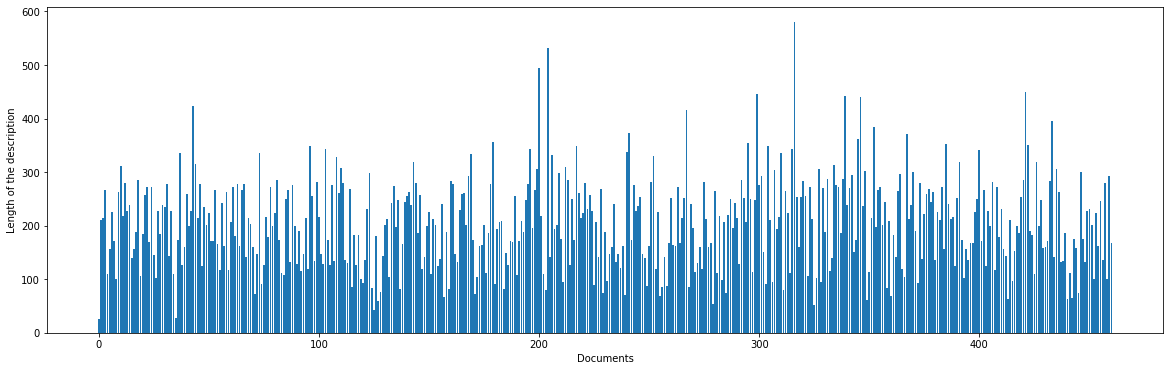

In [4]:
l = []
for doc in alldocs:
    l.append(len(doc.words))

print('Number of Documents : ', len(alldocs))
print('Mean length of documents : ', np.mean(l))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(l)), l)
plt.xlabel('Documents')
plt.ylabel('Length of the description')

In [5]:
# Un ejemplo de cómo se construye la lista alldocs

index = 0
doc = alldocs[index]
print(doc, '\n')
print(data[doc.original_number])

SentimentDocument(words=['evaluación', 'de', 'la', 'eficacia', 'de', 'un', 'protocolo', 'destinado', 'a', 'mejorar', 'el', 'control', 'glucémico', 'de', 'los', 'pacientes', 'con', 'hiperglucemia', 'ingresados', 'en', 'servicios', 'hospitalarios', 'de', 'medicina', 'interna'], tags=[0], title='Objetivos. Los objetivos del presente trabajo fueron evaluar si la difusión de un protocolo de manejo de la hiperglucemia sería capaz de incrementar el uso de insulina programada y mejorar el control glucémico durante la estancia hospitalaria. Pacientes y métodos. Estudio observacional de cohortes retrospectivo analítico. Se comparan 2 grupos de pacientes dados de alta con un diagnóstico relacionado con diabetes (DM) en servicios de Medicina Interna, antes (grupoPRE) y después (grupoPOS) de la implantación de un protocolo de actuación. Las respuestas analizadas fueron indicadores de proceso (probabilidad de permanecer sin insulina programada, evaluada mediante curvas de Kaplan-Meier), y de resulta

In [6]:

# PV-DM
model = Doc2Vec(dm=1, vector_size=300,window=10,hs=0,min_count=10,dbow_words=1,sample=1e-5)

# construye el vocabulario
model.build_vocab(alldocs)

In [7]:
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

In [8]:
model.save("vocabulario_medicina")
#Doc2Vec.load("model")

In [9]:
model.wv.most_similar_cosmul(positive = ["cáncer"])

[('yo', 0.9999282956123352),
 ('testosterona', 0.9999274611473083),
 ('radical', 0.9999252557754517),
 ('primer', 0.9999226927757263),
 ('presentamos', 0.9999224543571472),
 ('aquellos', 0.9999223947525024),
 ('biopsia', 0.9999220371246338),
 ('sometidos', 0.9999217987060547),
 ('resección', 0.9999210238456726),
 ('mm', 0.9999207258224487)]

In [10]:
model.wv.most_similar_cosmul(positive = ["mama"])

[('mm', 0.9999229907989502),
 ('resección', 0.9999229907989502),
 ('se', 0.9999226331710815),
 ('primer', 0.9999206066131592),
 ('pronóstico', 0.9999198913574219),
 ('diversas', 0.9999197721481323),
 ('patrón', 0.999919593334198),
 ('5', 0.9999195337295532),
 ('referencia', 0.9999185800552368),
 ('cáncer', 0.9999171495437622)]

In [11]:
model.wv.most_similar_cosmul(positive = ["tumor"])

[('pronóstico', 0.9999333620071411),
 ('células', 0.9999321103096008),
 ('presentamos', 0.9999295473098755),
 ('radical', 0.9999282360076904),
 ('primario', 0.9999261498451233),
 ('tumores', 0.9999259114265442),
 ('caso', 0.9999250173568726),
 ('origen', 0.999924898147583),
 ('casos', 0.9999237060546875),
 ('presentó', 0.9999231696128845)]

In [12]:
model.wv.most_similar_cosmul(negative = ["cáncer"], positive = ["mama","pacientes"])

[('10', 0.9998733997344971),
 ('ingreso', 0.9998697638511658),
 ('con', 0.9998687505722046),
 ('días', 0.9998642206192017),
 ('40', 0.9998635649681091),
 ('35', 0.9998613595962524),
 ('fueron', 0.9998613595962524),
 ('mortalidad', 0.9998595714569092),
 ('analizaron', 0.9998584389686584),
 ('diagnosticados', 0.9998577237129211)]

In [13]:

# Closest document to the word "war"

tokens = "cáncer"

new_vector = model.infer_vector(tokens.split() ,alpha=0.001 ,steps = 5)
tagsim = model.docvecs.most_similar([new_vector])[0]

docsim = alldocs[tagsim[0] ]

print("Document : ", data[docsim.original_number], "\n")
print("Titre : ", docsim.title)
print("Distance : ", tagsim[1])

Document :  Hiperodoncia múltiple y su relación con la displasia cleidocraneal	"La hiperodoncia son alteraciones del desarrollo dentario que exceden de la fórmula dental normal, se presentan diversas clasificaciones dependiendo de su localización, forma, número y medio ambiente, la hiperactividad de las células epiteliales de la lámina dental y la dicotomía son las teorías más aceptadas que intentar explicar su etiología," frecuentemente se detectan en el examen radiográfico de rutina. El diagnóstico y tratamiento temprano de un diente supernumerario, evita una serie de complicaciones como retrasos en su erupción dental, rotaciones, desplazamientos, apiñamiento, diastemas, entre otros"," también pueden estar asociados a síndromes genéticos como la Displasia cleidocraneal. Se reporta caso de paciente masculino de 12 años, que presenta características clínicas y radiográficas compatibles con la Displasia cleidocraneal, en el cual se observaron 8 dientes supernumerarios, 4 localizados en 

In [14]:
# Closest document to the word "love"

tokens = "tumor"

new_vector = model.infer_vector(tokens.split() ,alpha=0.001 ,steps = 5)
sims = model.docvecs.most_similar([new_vector], topn=model.docvecs.count) # get *all* similar documents

print("Most : " , data[alldocs[sims[0][0]].original_number], "\n") 
print("Median : " , data[alldocs[sims[170][0]].original_number], "\n")
print("Least : " , data[alldocs[sims[-1][0]].original_number])

Most :  Variz pulmonar en el interior de una bulla	"Las varices pulmonares son anomalías vasculares pulmonares infrecuentes. Suelen ser asintomáticas, por lo que normalmente se diagnostican como hallazgo casual en la radiografía de tórax, y con frecuencia se presentan como un nódulo pulmonar. Su origen puede ser congénito o adquirido," en este último caso se relaciona con una hipertensión pulmonar venosa, frecuentemente asociada a valvulopatía mitral. Su diagnóstico definitivo se realiza mediante arteriografía pulmonar, aunque cada vez más se están usando nuevas técnicas de imagen no invasivas. Normalmente no requieren tratamiento, a menos que presenten complicaciones graves. Exponemos un caso con una forma de presentación de variz pulmonar no descrita con anterioridad, ya que dicha anomalía se encontraba en el interior de una bulla pulmonar""""""","","","","","","","","","","","" 

Median :  Determinación de la substantividad de un dentífrico con flúor de aminas y xilitoly de un dentí